Variable	Description:
*  id	Player's identification number
*  player	Player's name
*  birthdate	Birthdate
*  state	Present status (former or active player)
*  pos	Position
*  place	Origin (USA/ not from the USA)
*  etni	Ethnicity
*  debut	NBA debut
*  from	First NBA season
*  fins	Last NBA season
*  dateevent	Date of death or July 31 2109
*  cens	Vital status by July 31 2019 (0, alive; 1, dead)
*  death	Vital status by July 31 2019
*  ageevent	Age at death or July 31 2019
*  ageleft	Age at NBA debut
*  ageright	Age at death or July 31 2019 (as decimal number)
*  kilos	Weight [kg]
*  cms	Height [cms]
*  bmi	Body mass index [kg/m^2]
*  g	Number of NBA games
*  lefthanded	Handedness (Yes, left; No, right)

# Carga de datos

## Dataset principal

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

nba_raw_df = pd.read_excel('https://github.com/marticasals/Reproducibility_Mortality_NBA_Players/raw/main/Data/NBA_raw_data2019.xlsx')

In [ ]:
nba_raw_df.to_csv('/content/data.csv', index=False)

In [ ]:
nba_raw_df.head()

,id,player,birthdate,state,pos,place,etni,debut,from,fins,...,cens,death,ageevent,ageleft,ageright,kilos,cms,bmi,g,lefthanded
0,1,Manute Bol,1962-10-16,Former,C,No USA,Black,1985-10-25,1985,1995,...,1,Yes,47,23.03,47.67,90.72,231.14,16.98,624,No
1,2,Gheorghe Muresan,1971-02-14,Former,C,No USA,White,1993-11-17,1993,2000,...,0,No,48,22.76,48.46,137.44,231.14,25.73,307,No
2,3,Shawn Bradley,1972-03-22,Former,C,No USA,White,1993-11-05,1993,2005,...,0,No,47,21.62,47.36,106.59,228.60,20.40,832,No
3,4,Yao Ming,1980-09-12,Former,C,No USA,Asian,2002-10-30,2002,2011,...,0,No,38,22.13,38.88,140.61,228.60,26.91,486,No
4,5,Chuck Nevitt,1959-06-13,Former,C,USA,White,1983-04-02,1982,1994,...,0,No,60,23.80,60.13,98.43,226.06,19.26,155,No


In [ ]:
nba_raw_df.describe()

,id,from,fins,cens,ageevent,ageleft,ageright,kilos,cms,bmi,g
count,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4371.000000,4374.000000,4371.000000,4374.000000
mean,2187.588477,1986.253315,1991.613169,0.197531,51.984911,23.321287,52.483013,95.062514,198.289383,24.104189,259.825103
std,1262.949097,21.678678,22.588928,0.398182,18.915974,2.139802,18.912276,11.974740,9.264391,1.695184,301.670876
min,1.000000,1946.000000,1947.000000,0.000000,19.000000,17.450000,19.730000,60.330000,160.020000,16.980000,1.000000
25%,1094.250000,1971.000000,1976.000000,0.000000,35.000000,22.170000,35.875000,86.180000,190.500000,23.060000,32.000000
50%,2187.500000,1989.000000,1995.000000,0.000000,51.000000,22.930000,51.825000,95.250000,198.120000,24.000000,122.000000
75%,3280.750000,2005.000000,2012.000000,0.000000,67.000000,24.110000,67.147500,102.060000,205.740000,25.090000,426.000000
max,4375.000000,2018.000000,2020.000000,1.000000,99.000000,45.750000,99.550000,163.000000,231.140000,31.913227,1611.000000


In [ ]:
nba_raw_df.columns

Index(['id', 'player', 'birthdate', 'state', 'pos', 'place', 'etni', 'debut',
       'from', 'fins', 'dateevent', 'cens', 'death', 'ageevent', 'ageleft',
       'ageright', 'kilos', 'cms', 'bmi', 'g', 'lefthanded'],
      dtype='object')

In [ ]:
nba_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4374 entries, 0 to 4373
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          4374 non-null   int64         
 1   player      4374 non-null   object        
 2   birthdate   4374 non-null   datetime64[ns]
 3   state       4374 non-null   object        
 4   pos         4374 non-null   object        
 5   place       4374 non-null   object        
 6   etni        4374 non-null   object        
 7   debut       4374 non-null   datetime64[ns]
 8   from        4374 non-null   int64         
 9   fins        4374 non-null   int64         
 10  dateevent   4374 non-null   datetime64[ns]
 11  cens        4374 non-null   int64         
 12  death       4374 non-null   object        
 13  ageevent    4374 non-null   int64         
 14  ageleft     4374 non-null   float64       
 15  ageright    4374 non-null   float64       
 16  kilos       4371 non-nul

## Probabilidades de muerte

In [ ]:
mortality_df = pd.read_excel('https://github.com/marticasals/Reproducibility_Mortality_NBA_Players/raw/main/Data/MortalityUSA2000to2018.xlsx',skipfooter=1)

In [ ]:
mortality_df.head()

,edad,prob2000Mwhite,prob2000Mblack,prob2001Mwhite,prob2001Mblack,prob2002Mwhite,prob2002Mblack,prob2003Mwhite,prob2003Mblack,prob2004Mwhite,...,prob2014Mwhite,prob2014Mblack,prob2015Mwhite,prob2015Mblack,prob2016Mwhite,prob2016Mblack,prob2017Mwhite,prob2017Mblack,prob2018Mwhite,prob2018Mblack
0,18,0.000922,0.001325,0.000902,0.001303,0.000926,0.001198,0.000894,0.001181,0.000880,...,0.000576,0.000923,0.000587,0.001014,0.000627,0.001108,0.000642,0.001172,0.000627,0.000833
1,19,0.001025,0.001556,0.001014,0.001546,0.001041,0.001437,0.001017,0.001425,0.001002,...,0.000703,0.001114,0.000722,0.001233,0.000773,0.001344,0.000778,0.001370,0.000747,0.000973
2,20,0.001102,0.001783,0.001100,0.001782,0.001126,0.001677,0.001115,0.001670,0.001103,...,0.000835,0.001302,0.000865,0.001449,0.000929,0.001579,0.000921,0.001554,0.000873,0.001109
3,21,0.001181,0.002035,0.001187,0.002037,0.001210,0.001935,0.001215,0.001930,0.001203,...,0.000970,0.001485,0.001013,0.001664,0.001091,0.001817,0.001068,0.001736,0.001002,0.001247
4,22,0.001260,0.002286,0.001272,0.002287,0.001293,0.002184,0.001310,0.002182,0.001299,...,0.001092,0.001645,0.001148,0.001852,0.001241,0.002031,0.001209,0.001909,0.001130,0.001380


In [ ]:
mortality_df.shape

(83, 39)

In [ ]:
mortality_df.columns

Index(['edad', 'prob2000Mwhite', 'prob2000Mblack', 'prob2001Mwhite',
       'prob2001Mblack', 'prob2002Mwhite', 'prob2002Mblack', 'prob2003Mwhite',
       'prob2003Mblack', 'prob2004Mwhite', 'prob2004Mblack', 'prob2005Mwhite',
       'prob2005Mblack', 'prob2006Mwhite', 'prob2006Mblack', 'prob2007Mwhite',
       'prob2007Mblack', 'prob2008Mwhite', 'prob2008Mblack', 'prob2009Mwhite',
       'prob2009Mblack', 'prob2010Mwhite', 'prob2010Mblack', 'prob2011Mwhite',
       'prob2011Mblack', 'prob2012Mwhite', 'prob2012Mblack', 'prob2013Mwhite',
       'prob2013Mblack', 'prob2014Mwhite', 'prob2014Mblack', 'prob2015Mwhite',
       'prob2015Mblack', 'prob2016Mwhite', 'prob2016Mblack', 'prob2017Mwhite',
       'prob2017Mblack', 'prob2018Mwhite', 'prob2018Mblack'],
      dtype='object')

# Subconjuntos para analizar

### Players who finished NBA career latest in 2019.

In [ ]:
## Subset of players who finished NBA career latest in 2019.
## ---------------------------------------------------------
# nbaformupd: Data frame of 3962 former NBA players.

In [ ]:
nbaupd = nba_raw_df

In [ ]:
nbaformupd = nbaupd[nba_raw_df['state'] == "Former"]

In [ ]:
nbaformupd.shape

(3962, 21)

endest: Estimated date of last NBA match.

If endest >= dateevent, we assume
that two days elapsed between last NBA match and death (==> survtime > 0).

In [ ]:
from datetime import timedelta
import numpy as np
nbaformupd = nbaformupd.copy()
nbaformupd['endest'] =  pd.to_datetime(nbaformupd['fins'].map(str) + '-06-01').reset_index(drop=True)
nbaformupd['endest'] = np.where(nbaformupd['endest'] >= nbaformupd['dateevent'],
                                 nbaformupd['dateevent'] - pd.DateOffset(days=2),
                                 nbaformupd['endest'])


nbaformupd['survtime'] = round(((nbaformupd['dateevent'] - nbaformupd['endest']).dt.days / 365.25),2)
nbaformupd['ageend'] = round(((nbaformupd['endest'] - nbaformupd['birthdate']).dt.days / 365.25),2)
nbaformupd['len'] = nbaformupd['fins'] - nbaformupd['from']
nbaformupd = nbaformupd[['id', 'player' ,'birthdate', 'pos', 'place', 'etni' , 'debut', 'from', 'fins', 'endest', 'len', 'ageleft', 'ageend', 'dateevent', 'survtime', 'cens', 'ageevent', 'kilos', 'cms','bmi','g', 'lefthanded']]

In [ ]:
nbaformupd['ageend'].head()

0    32.62
1    29.30
2    33.19
3    30.72
4    34.97
Name: ageend, dtype: float64

In [ ]:
nbaformupd.shape

(3962, 22)

In [ ]:
nbaformupd

,id,player,birthdate,pos,place,etni,debut,from,fins,endest,...,ageend,dateevent,survtime,cens,ageevent,kilos,cms,bmi,g,lefthanded
0,1,Manute Bol,1962-10-16,C,No USA,Black,1985-10-25,1985,1995,1995-06-01,...,32.62,2010-06-19,15.05,1,47,90.72,231.14,16.980000,624,No
1,2,Gheorghe Muresan,1971-02-14,C,No USA,White,1993-11-17,1993,2000,2000-06-01,...,29.30,2019-07-31,19.16,0,48,137.44,231.14,25.730000,307,No
2,3,Shawn Bradley,1972-03-22,C,No USA,White,1993-11-05,1993,2005,2005-06-01,...,33.19,2019-07-31,14.16,0,47,106.59,228.60,20.400000,832,No
3,4,Yao Ming,1980-09-12,C,No USA,Asian,2002-10-30,2002,2011,2011-06-01,...,30.72,2019-07-31,8.16,0,38,140.61,228.60,26.910000,486,No
4,5,Chuck Nevitt,1959-06-13,C,USA,White,1983-04-02,1982,1994,1994-06-01,...,34.97,2019-07-31,25.16,0,60,98.43,226.06,19.260000,155,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4350,3926,Bobby Cook,1923-04-01,G-F,USA,White,1949-11-01,1949,1950,NaT,...,NaN,2004-10-11,NaN,1,81,70.31,177.80,22.240000,51,No
4351,3950,Rollie Seltz,1924-01-25,G-F,USA,White,1949-11-01,1949,1950,NaT,...,NaN,2019-07-31,NaN,0,95,74.84,177.80,23.670000,34,No
4352,3953,Stan Stutz,1920-04-14,G-F,USA,White,1946-11-01,1946,1949,NaT,...,NaN,1975-10-28,NaN,1,55,77.11,177.80,24.390000,166,No
4353,4017,Jonathon Simmons,1989-09-14,G-F,USA,Black,2015-11-14,2015,2019,NaT,...,NaN,2019-07-31,NaN,0,29,88.00,198.12,22.419506,258,No


### White and African-american players

In [ ]:
#Creation of subsets with of white and African-american players

nbaupdBW <- nbaupd %>%
  filter(etni %in% c("White", "Black")) %>%
  mutate(etni = factor(etni, levels = c("White", "Black")))

nbaformuBW <- nbaformupd %>%
  filter(etni %in% c("White", "Black")) %>%
  mutate(etni = factor(etni, levels = c("White", "Black")))

In [ ]:
nbaupdBW = nbaupd[nbaupd['etni'].isin(["White", "Black"])]


In [ ]:
nbaupdBW.shape

(4205, 21)

In [ ]:
nbaformuBW = nbaformupd[nbaformupd['etni'].isin(["White", "Black"])]

In [ ]:
nbaformuBW.shape

(3838, 22)

## Mortatlity data

In [ ]:
mortality_df.shape

(83, 39)

In [ ]:
mortality_df.rename(columns={'edad': 'age'}, inplace=True)

In [ ]:
mortality_df.head()

,age,prob2000Mwhite,prob2000Mblack,prob2001Mwhite,prob2001Mblack,prob2002Mwhite,prob2002Mblack,prob2003Mwhite,prob2003Mblack,prob2004Mwhite,...,prob2014Mwhite,prob2014Mblack,prob2015Mwhite,prob2015Mblack,prob2016Mwhite,prob2016Mblack,prob2017Mwhite,prob2017Mblack,prob2018Mwhite,prob2018Mblack
0,18,0.000922,0.001325,0.000902,0.001303,0.000926,0.001198,0.000894,0.001181,0.000880,...,0.000576,0.000923,0.000587,0.001014,0.000627,0.001108,0.000642,0.001172,0.000627,0.000833
1,19,0.001025,0.001556,0.001014,0.001546,0.001041,0.001437,0.001017,0.001425,0.001002,...,0.000703,0.001114,0.000722,0.001233,0.000773,0.001344,0.000778,0.001370,0.000747,0.000973
2,20,0.001102,0.001783,0.001100,0.001782,0.001126,0.001677,0.001115,0.001670,0.001103,...,0.000835,0.001302,0.000865,0.001449,0.000929,0.001579,0.000921,0.001554,0.000873,0.001109
3,21,0.001181,0.002035,0.001187,0.002037,0.001210,0.001935,0.001215,0.001930,0.001203,...,0.000970,0.001485,0.001013,0.001664,0.001091,0.001817,0.001068,0.001736,0.001002,0.001247
4,22,0.001260,0.002286,0.001272,0.002287,0.001293,0.002184,0.001310,0.002182,0.001299,...,0.001092,0.001645,0.001148,0.001852,0.001241,0.002031,0.001209,0.001909,0.001130,0.001380


In [ ]:
print(nbaupd.shape)
print(nbaformupd.shape)
print(nbaupdBW.shape)
print(nbaformuBW.shape)
print(mortality_df.shape)


(4374, 21)
(3962, 22)
(4205, 21)
(3838, 22)
(83, 39)


# Librerias

In [ ]:
pip install lifelines

In [ ]:
pip install pyreadr

In [ ]:
nbaupdBW['etni']

0       Black
1       White
2       White
4       White
5       White
        ...  
4369    White
4370    Black
4371    Black
4372    Black
4373    Black
Name: etni, Length: 4205, dtype: object

# Table 1

## Active vs Former

### Conversiones

In [ ]:
nbaupd['lefthanded'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
nbaupd['state'].unique()

array(['Former', 'Active'], dtype=object)

In [ ]:
nbaupd['state'] = np.where(nbaupd['state'] == "Active", 1, 0)

In [ ]:
nbaupd.columns

Index(['id', 'player', 'birthdate', 'state', 'pos', 'place', 'etni', 'debut',
       'from', 'fins', 'dateevent', 'cens', 'death', 'ageevent', 'ageleft',
       'ageright', 'kilos', 'cms', 'bmi', 'g', 'lefthanded'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
def oneHot(df,col):
  ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
  result = pd.DataFrame(ohe.fit_transform(df[[col]]))
  return result


data_class = oneHot(nbaupd,"pos")
data_class = data_class.rename(columns={0:'C', 1:'F', 2:'F-C', 3:'G', 4:'G-F'})

In [ ]:
# data_class.iloc[2504]
nbaupd = pd.concat([nbaupd, data_class], axis=1)

In [ ]:
nbaupd.columns

Index(['id', 'player', 'birthdate', 'state', 'pos', 'place', 'etni', 'debut',
       'from', 'fins', 'dateevent', 'cens', 'death', 'ageevent', 'ageleft',
       'ageright', 'kilos', 'cms', 'bmi', 'g', 'lefthanded', 'C', 'F', 'F-C',
       'G', 'G-F'],
      dtype='object')

In [ ]:
nbaupd['etni'].unique()

array(['Black', 'White', 'Asian', 'Mixed', 'Unknown'], dtype=object)

In [ ]:
etni_class = oneHot(nbaupd,"etni")
etni_class = etni_class.rename(columns={0:'e_Asian', 1:'e_Black', 2:'e_Mixed', 3:'e_Unknown', 4:'e_White'})

In [ ]:
# etni_class.iloc[188]
nbaupd = pd.concat([nbaupd, etni_class], axis=1)

In [ ]:
nbaupd.columns

Index(['id', 'player', 'birthdate', 'state', 'pos', 'place', 'etni', 'debut',
       'from', 'fins', 'dateevent', 'cens', 'death', 'ageevent', 'ageleft',
       'ageright', 'kilos', 'cms', 'bmi', 'g', 'lefthanded', 'C', 'F', 'F-C',
       'G', 'G-F', 'e_Asian', 'e_Black', 'e_Mixed', 'e_Unknown', 'e_White'],
      dtype='object')

In [ ]:
nbaupd['place'].unique()

array(['No USA', 'USA'], dtype=object)

In [ ]:
place_class = oneHot(nbaupd,"place")
place_class = place_class.rename(columns={0:'No USA', 1:'USA'})
nbaupd = pd.concat([nbaupd, place_class], axis=1)

In [ ]:
nbaupd["lefthanded"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
left_class = oneHot(nbaupd,"lefthanded")
left_class = left_class.rename(columns={0:'left_No', 1:'left_Yes'})
nbaupd = pd.concat([nbaupd, left_class], axis=1)

In [ ]:
nbaupd.columns

Index(['id', 'player', 'birthdate', 'state', 'pos', 'place', 'etni', 'debut',
       'from', 'fins', 'dateevent', 'cens', 'death', 'ageevent', 'ageleft',
       'ageright', 'kilos', 'cms', 'bmi', 'g', 'lefthanded', 'C', 'F', 'F-C',
       'G', 'G-F', 'e_Asian', 'e_Black', 'e_Mixed', 'e_Unknown', 'e_White',
       'No USA', 'USA', 'left_No', 'left_Yes'],
      dtype='object')

### Cantidad de Active y Former por feature

In [ ]:
selected_columns =["e_Asian","e_Black","e_Mixed","e_Unknown","e_White"]
# selected_columns =[ "C", "F", "F-C","G", "G-F","e_Asian","e_Black","e_Mixed","e_Unknown","e_White", "No USA", "USA", "left_No","left_Yes"]

# Filtering rows where 'state' is 1
filtered_active = nbaupd[nbaupd['state'] == 1]
filtered_former = nbaupd[nbaupd['state'] == 0]
# Calculating the sum of each selected column
column_sums_a = filtered_active[selected_columns].sum()
column_sums_f = filtered_former[selected_columns].sum()

# Displaying the results
print("Cantidad de Active por feature:")
print(column_sums_a.astype(int))
print("\nCantidad de Former por feature:")
print(column_sums_f.astype(int))


Cantidad de Active por feature:
e_Asian        1
e_Black      284
e_Mixed       40
e_Unknown      4
e_White       83
dtype: int64

Cantidad de Former por feature:
e_Asian        12
e_Black      2308
e_Mixed        97
e_Unknown      15
e_White      1530
dtype: int64


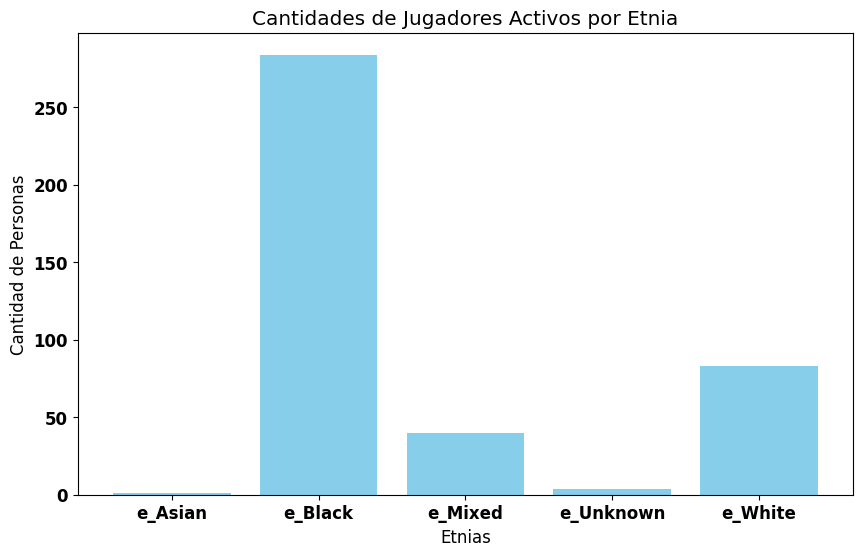

In [ ]:
import matplotlib.pyplot as plt
def grafica_barras(serie, titulo):
  data = {'Value': serie, 'Feature':serie.index}
  new_df_a = pd.DataFrame.from_dict(data)

  plt.figure(figsize=(10, 6))
  plt.bar(new_df_a['Feature'], new_df_a['Value'], color='skyblue')

  plt.xlabel('Etnias')
  plt.ylabel('Cantidad de Personas')
  plt.title(titulo)
  plt.show()

grafica_barras(column_sums_a, "Cantidades de Jugadores Activos por Etnia")

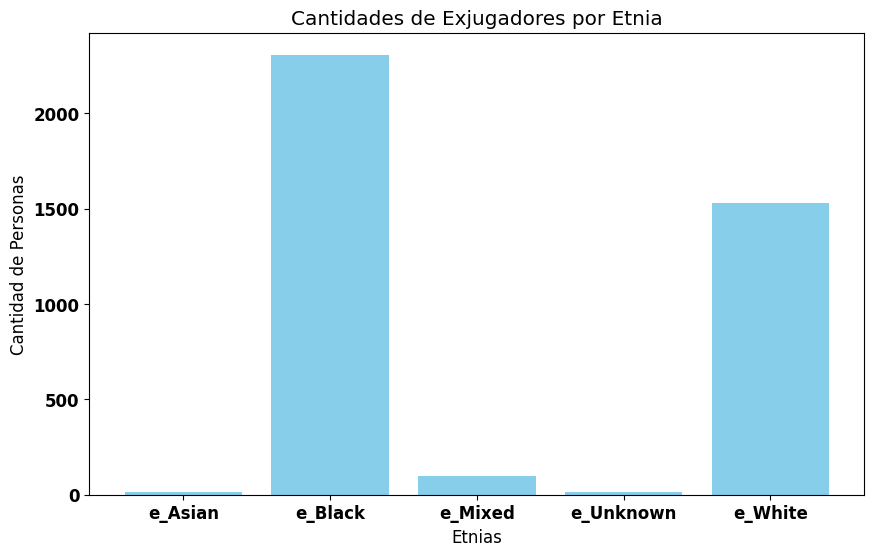

In [ ]:
grafica_barras(column_sums_f, "Cantidades de Exjugadores por Etnia")

### Promedios de Active y Former según feature

In [ ]:
def promedios(columns,df):
  column_average = df[columns].mean()
  return column_average

cols =[ "C", "F", "F-C","G", "G-F","e_Asian","e_Black","e_Mixed","e_Unknown","e_White", "No USA", "USA", "left_No","left_Yes"]
res_a = promedios(cols, filtered_active)
res_f = promedios(cols, filtered_former)


data = {'Active': round(res_a * 100,2), 'Former': round(res_f * 100,2) }
new_df = pd.DataFrame.from_dict(data)
new_df.reset_index(inplace=True)

print("Promedio  de cantidades segun feature:\n")
new_df

Promedio  de cantidades segun feature:



,index,Active,Former
0,C,12.38,11.28
1,F,25.97,29.00
2,F-C,9.47,12.75
3,G,37.62,34.68
4,G-F,14.56,12.29
5,e_Asian,0.24,0.30
6,e_Black,68.93,58.25
7,e_Mixed,9.71,2.45
8,e_Unknown,0.97,0.38
9,e_White,20.15,38.62


In [ ]:
cols =[ "ageleft", "ageright", "cms", "kilos", "g"]
res_a = promedios(cols, filtered_active)
res_f = promedios(cols, filtered_former)

data = {'Active': round(res_a,2), 'Former': round(res_f,2) }
new_df_p = pd.DataFrame.from_dict(data)
new_df_p.reset_index(inplace=True)

print("Promedio de valores segun feature:\n")
new_df_p


Promedio de valores segun feature:



,index,Active,Former
0,ageleft,21.66,23.49
1,ageright,26.55,55.18
2,cms,199.86,198.13
3,kilos,98.40,94.72
4,g,193.09,266.76


## Alive vs dead (among former NBA players)

### Conversiones

In [ ]:
nbaformupd["pos"].unique()

array(['C', 'F-C', 'F', 'G-F', 'G'], dtype=object)

In [ ]:
nbaformupd["lefthanded"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
nbaformupd["place"].unique()

array(['No USA', 'USA'], dtype=object)

In [ ]:
nbaformupd["etni"].unique()

array(['Black', 'White', 'Asian', 'Mixed', 'Unknown'], dtype=object)

In [ ]:
nbaformupd.loc[nbaformupd["pos"]=="G-F", ["G-F"]]=1
nbaformupd.loc[nbaformupd["pos"]!="G-F", ["G-F"]]=0

nbaformupd.loc[nbaformupd["pos"]=="C", ["C"]]=1
nbaformupd.loc[nbaformupd["pos"]!="C", ["C"]]=0

nbaformupd.loc[nbaformupd["pos"]=="F", ["F"]]=1
nbaformupd.loc[nbaformupd["pos"]!="F", ["F"]]=0

nbaformupd.loc[nbaformupd["pos"]=="F-C", ["F-C"]]=1
nbaformupd.loc[nbaformupd["pos"]!="F-C", ["F-C"]]=0

nbaformupd.loc[nbaformupd["pos"]=="G", ["G"]]=1
nbaformupd.loc[nbaformupd["pos"]!="G", ["G"]]=0


In [ ]:
nbaformupd.loc[nbaformupd["etni"]=="Asian", ["e_Asian"]]=1
nbaformupd.loc[nbaformupd["etni"]!="Asian", ["e_Asian"]]=0

nbaformupd.loc[nbaformupd["etni"]=="Black", ["e_Black"]]=1
nbaformupd.loc[nbaformupd["etni"]!="Black", ["e_Black"]]=0

nbaformupd.loc[nbaformupd["etni"]=="Mixed", ["e_Mixed"]]=1
nbaformupd.loc[nbaformupd["etni"]!="Mixed", ["e_Mixed"]]=0

nbaformupd.loc[nbaformupd["etni"]=="Unknown", ["e_Unknown"]]=1
nbaformupd.loc[nbaformupd["etni"]!="Unknown", ["e_Unknown"]]=0

nbaformupd.loc[nbaformupd["etni"]=="White", ["e_White"]]=1
nbaformupd.loc[nbaformupd["etni"]!="White", ["e_White"]]=0

In [ ]:
nbaformupd.head()

,id,player,birthdate,pos,place,etni,debut,from,fins,endest,...,G-F,C,F,F-C,G,e_Asian,e_Black,e_Mixed,e_Unknown,e_White
0,1,Manute Bol,1962-10-16,C,No USA,Black,1985-10-25,1985,1995,1995-06-01,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,Gheorghe Muresan,1971-02-14,C,No USA,White,1993-11-17,1993,2000,2000-06-01,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,Shawn Bradley,1972-03-22,C,No USA,White,1993-11-05,1993,2005,2005-06-01,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,Yao Ming,1980-09-12,C,No USA,Asian,2002-10-30,2002,2011,2011-06-01,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,Chuck Nevitt,1959-06-13,C,USA,White,1983-04-02,1982,1994,1994-06-01,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
nbaformupd.loc[nbaformupd["place"]=="No USA", ["No USA"]]=1
nbaformupd.loc[nbaformupd["place"]!="No USA", ["No USA"]]=0

nbaformupd.loc[nbaformupd["place"]=="USA", ["USA"]]=1
nbaformupd.loc[nbaformupd["place"]!="USA", ["USA"]]=0

In [ ]:

nbaformupd.loc[nbaformupd["lefthanded"]=="Yes", ["left_Yes"]]=1
nbaformupd.loc[nbaformupd["lefthanded"]!="Yes", ["left_Yes"]]=0

nbaformupd.loc[nbaformupd["lefthanded"]=="No", ["left_No"]]=1
nbaformupd.loc[nbaformupd["lefthanded"]!="No", ["left_No"]]=0

### Cantidad de Muertos y Vivos por categoría

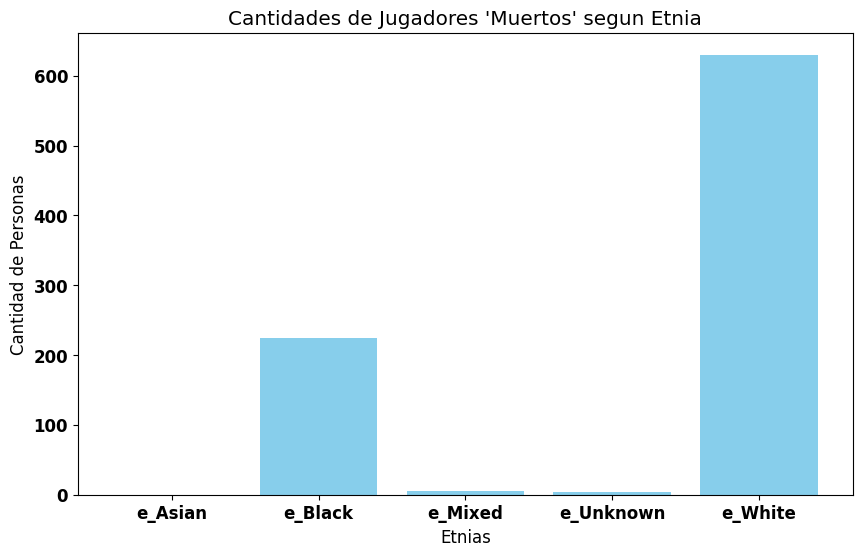

In [ ]:
selected_columns =["e_Asian","e_Black","e_Mixed","e_Unknown","e_White"]


# cens Vital status by July 31 2019 (0, alive; 1, dead)
filtered_dead = nbaformupd[nbaformupd['cens'] == 1]
filtered_alive = nbaformupd[nbaformupd['cens'] == 0]
# Calculating the sum of each selected column
column_sums_d = filtered_dead[selected_columns].sum()
column_sums_a = filtered_alive[selected_columns].sum()

grafica_barras(column_sums_d, "Cantidades de Jugadores 'Muertos' segun Etnia")

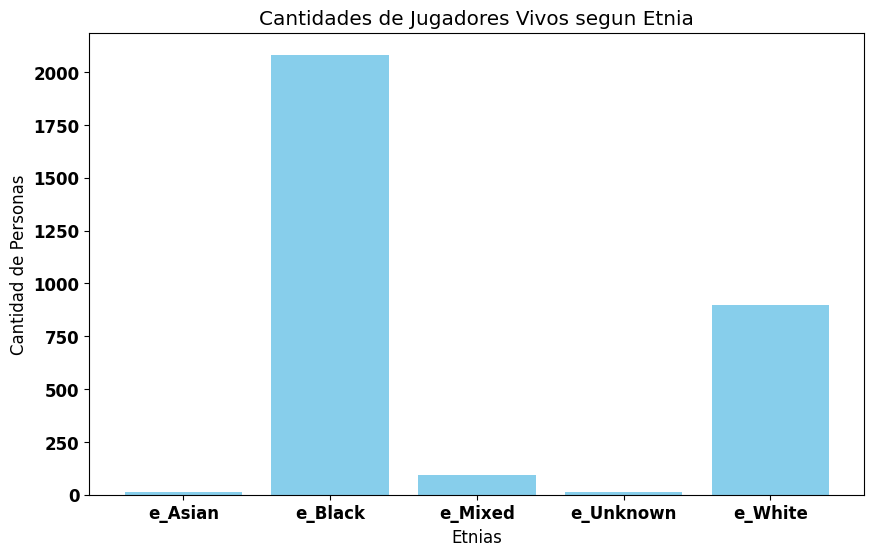

In [ ]:
grafica_barras(column_sums_a, "Cantidades de Jugadores Vivos segun Etnia")

### Promedios de Vivos y Muertos

In [ ]:
cols =[ "C", "F", "F-C","G", "G-F","e_Asian","e_Black","e_Mixed","e_Unknown","e_White", "No USA", "USA", "left_No","left_Yes"]
res_d = promedios(cols, filtered_dead)
res_a = promedios(cols, filtered_alive)


data = {'Muertos': round(res_d * 100,2), 'Vivos': round(res_a * 100,2) }
new_df = pd.DataFrame.from_dict(data)
new_df.reset_index(inplace=True)

print("Promedio en porcentaje de cantidades segun feature:\n")
new_df


Promedio en porcentaje de cantidades segun feature:



,index,Muertos,Vivos
0,C,10.19,11.59
1,F,24.77,30.18
2,F-C,20.60,10.56
3,G,27.20,36.77
4,G-F,17.25,10.91
5,e_Asian,0.00,0.39
6,e_Black,26.04,67.24
7,e_Mixed,0.58,2.97
8,e_Unknown,0.46,0.36
9,e_White,72.92,29.05


In [ ]:
cols =[ "ageleft", "ageend", "cms", "kilos", "g"]
res_d = promedios(cols, filtered_dead)
res_a = promedios(cols, filtered_alive)

data = {'Active': round(res_d,2), 'Former': round(res_a,2) }
new_df_p = pd.DataFrame.from_dict(data)
new_df_p.reset_index(inplace=True)

print("Promedio de valores segun feature:\n")
new_df_p


Promedio de valores segun feature:



,index,Active,Former
0,ageleft,24.54,23.20
1,ageend,49.46,20.97
2,cms,194.09,199.25
3,kilos,90.07,96.01
4,g,188.43,288.61


# Table 2 (Cox model)

In [ ]:
nbaupdBW["from"].unique()

array([1985, 1993, 1982, 2004, 2003, 1996, 1983, 1988, 1960, 1997, 1999,
       1995, 2009, 1969, 2005, 2001, 1974, 1980, 1976, 1981, 2008, 2000,
       1991, 1987, 1990, 1971, 2007, 1998, 2002, 2010, 1979, 1984, 1959,
       1989, 1986, 1970, 2006, 2013, 2012, 1994, 1992, 1977, 1946, 1968,
       1955, 1966, 2011, 1963, 2014, 1967, 1973, 1961, 1972, 1975, 1978,
       1953, 1951, 1949, 1948, 1956, 1965, 1962, 1958, 1950, 1954, 1964,
       1952, 1947, 2015, 2016, 2017, 2018, 1957])

In [ ]:
nbaupdBW['etni'].unique()

array(['Black', 'White'], dtype=object)

In [ ]:
nbaupdBW = nbaupdBW.copy()
nbaupdBW.loc[:, 'etni2'] = np.where(nbaupdBW['etni'] == "Black", 1, 0)
nbaupdBW['etni'] = nbaupdBW['etni2']


In [ ]:
nbaupdBW['etni'].unique()

array([1, 0])

In [ ]:
# Table 2 (Cox model)
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(nbaupdBW, duration_col='ageright', event_col='cens', formula="cms + etni + from")

# Display summary
cph.print_summary()

# Display confidence intervals
ci = cph.confidence_intervals_
ci_exp = np.exp(ci)
ci_exp_rounded = np.round(ci_exp, 3)
print(ci_exp_rounded)

<lifelines.CoxPHFitter: fitted with 4205 total observations, 3350 right-censored observations>
             duration col = 'ageright'
                event col = 'cens'
      baseline estimation = breslow
   number of observations = 4205
number of events observed = 855
   partial log-likelihood = -5483.25
         time fit was run = 2023-12-01 19:20:19 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
cms         0.02       1.02       0.00             0.01             0.03                 1.01                 1.03
etni        0.33       1.39       0.10             0.13             0.52                 1.14                 1.68
from       -0.02       0.98       0.00            -0.03            -0.02                 0.97                 0.98

            cmp to     z      p   -log2(p)
covariate                                 
cms           0.00  4.68 <0.005      18.44
etni          0.00  3.30 <0.005      10.00
from          0.00 -5.74 <0.005      26.67
---
Concordance = 0.57
Partial AIC = 10972.49
log-likelihood ratio test = 44.74 on 3 df
-log2(p) of ll-ratio test = 29.82

           95% lower-bound  95% upper-bound
covariate                                  
cms                  1.012            1.030
etni                 1.142            1.683
from                 0.968            0.984


# Figure 1

In [ ]:
max(nbaupd['ageright'])

99.55

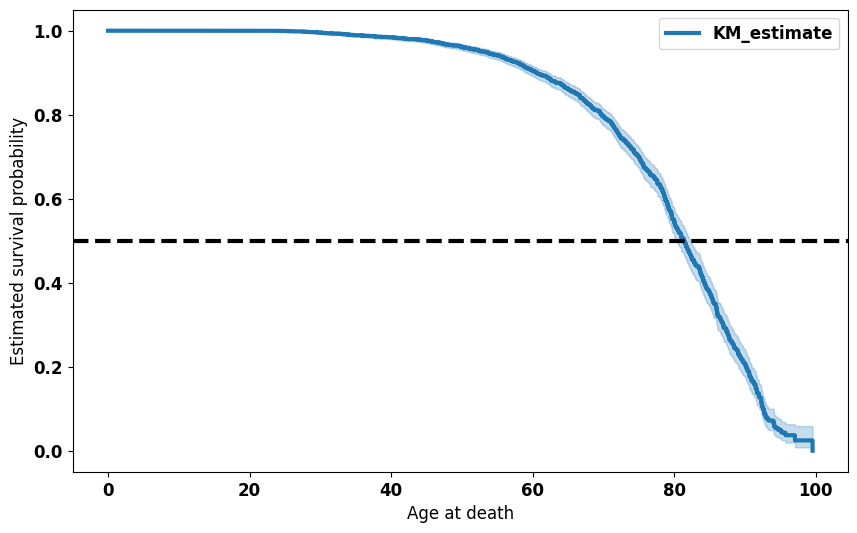

In [ ]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

nbaupd['duration'] = nbaupd['ageright']
nbaupd['event'] = np.where(nbaupd['cens'] == 1, 1, 0)

kmf = KaplanMeierFitter()
kmf.fit(durations=nbaupd['duration'], event_observed=nbaupd['event'])


plt.figure(figsize=(10, 6))
kmf.plot_survival_function(lw=3)
plt.xlabel("Age at death")
plt.ylabel("Estimated survival probability")
plt.axhline(y=0.5, linestyle="--", color="black", lw=3)
plt.show()

# Figure 2 (Standard Mortality Ratios)

In [ ]:
SMRs = {year: {"AfricanAmerican": [0, 0, 0], "White": [0, 0, 0]} for year in range(2000, 2019)}
years = list(range(2000, 2019))

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

def ageadjust_indirect(count, pop, stdcount=None, stdpop=None, stdrate=None, conf_level=0.95):
    zv = norm.ppf(0.5 * (1 + conf_level))
    countsum = np.sum(count)

    if stdrate is None and len(stdcount) > 1 and len(stdpop) > 1:
        stdrate = np.array(stdcount) / np.array(stdpop)

    expected = np.sum(stdrate * pop)
    sir = countsum / expected
    logsir_lci = np.log(sir) - zv * (1 / np.sqrt(countsum))
    logsir_uci = np.log(sir) + zv * (1 / np.sqrt(countsum))
    sir_lci = np.exp(logsir_lci)
    sir_uci = np.exp(logsir_uci)

    stdcrate = np.sum(stdcount) / np.sum(stdpop)
    crude_rate = np.sum(count) / np.sum(pop)
    isr = sir * stdcrate
    isr_lci = sir_lci * stdcrate
    isr_uci = sir_uci * stdcrate

    results = {
        'sir': {'observed': round(countsum,2), 'exp': round(expected,2), 'sir': round(sir,2), 'lci': round(sir_lci,2), 'uci': round(sir_uci,2)},
        'rate': {'crude_rate': crude_rate, 'adj_rate': isr, 'lci': isr_lci, 'uci': isr_uci}
    }

    return results["sir"]

In [ ]:
nbaupdBW['etni'].unique()

array([1, 0])

In [ ]:
from datetime import datetime
import statsmodels.api as sm
from scipy.stats import poisson
from statsmodels.stats.proportion import proportion_confint

for y in range(2000, 2019):
    # Age distribution by January 1
    nbaupdBW['jan1'] = f"{y}-01-01"
    # Calculate age and assign it to the 'age' column
    nbaupdBW['age'] = (pd.to_datetime(nbaupdBW['jan1']) - pd.to_datetime(nbaupdBW['birthdate'])) // pd.Timedelta(days=365.25)

    # Convert the result to a vector (numpy array)
    nbaupdBW['age'] = nbaupdBW['age'].astype(int)


    # Exclude those with later debut and death before
    nbaupdBW["age"] = np.where((nbaupdBW["debut"] > pd.to_datetime(nbaupdBW['jan1'])) | (nbaupdBW["dateevent"] < pd.to_datetime(nbaupdBW['jan1'])), np.nan, nbaupdBW["age"])

    # New variable: Death in the current year
    nbaupdBW["deathyr"] = np.where((pd.to_datetime(nbaupdBW["dateevent"]).dt.year == y) & (nbaupdBW["cens"] == 1), 1, 0)

    # Separate tables for African-American and white players
    white = nbaupdBW[nbaupdBW['etni'] == 0]
    black = nbaupdBW[nbaupdBW['etni'] == 1]

    tabWDeaths = pd.crosstab(white['age'], white['deathyr'])
    tabBDeaths = pd.crosstab(black['age'], black['deathyr'])

    # Create auxiliary data frames
    auxW = pd.DataFrame({
        'age': tabWDeaths.index,
        'nkW': tabWDeaths.sum(axis=1),
        'mkW': tabWDeaths.iloc[:, 1]
    })

    auxB = pd.DataFrame({
        'age': tabBDeaths.index,
        'nkB': tabBDeaths.sum(axis=1),
        'mkB': tabBDeaths.iloc[:, 1]
    })
    # Mortality rates

    auxB.drop(['age'], axis=1,inplace=True)
    auxW.drop(['age'], axis=1,inplace=True)
    auxB.reset_index(inplace=True)
    auxW.reset_index(inplace=True)

    mrates = pd.merge(auxW, auxB, how="outer")

    # Merging with death rates of the current year
    auxvs = ["age", f"prob{y}Mwhite", f"prob{y}Mblack"]
    mrates = pd.merge(mrates, mortality_df[auxvs], how='outer')


    mrates.rename(columns={f"prob{y}Mwhite": "probWhite", f"prob{y}Mblack": "probBlack"}, inplace=True)

    smrW = ageadjust_indirect(count=mrates["mkW"], pop=mrates["nkW"], stdcount=0, stdpop=0, stdrate=mrates["probWhite"])
    smrB = ageadjust_indirect(count=mrates["mkB"], pop=mrates["nkB"], stdcount=0, stdpop=0, stdrate=mrates["probBlack"])

    SMRs[y]["White"] = [smrW["sir"],smrW["lci"],smrW["uci"]]
    SMRs[y]["AfricanAmerican"] = [smrB["sir"],smrB["lci"],smrB["uci"]]

    nbaupdBW.drop(["age", "deathyr","jan1"], axis=1, inplace=True)


## Graphical representation

In [ ]:
# print(SMRs)
smrs = pd.DataFrame([[val["AfricanAmerican"][0],val["AfricanAmerican"][1],val["AfricanAmerican"][2],val["White"][0],val["White"][1],val["White"][2]] for val in SMRs.values()], columns=["blsmr", "bllow95", "blupp95", "whsmr", "whlow95", "whupp95"])


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter


# Convert SMRs dictionary to a DataFrame
smrs = pd.DataFrame([[val["AfricanAmerican"][0],val["AfricanAmerican"][1],val["AfricanAmerican"][2],val["White"][0],val["White"][1],val["White"][2]] for val in SMRs.values()], columns=["blsmr", "bllow95", "blupp95", "whsmr", "whlow95", "whupp95"])
smrs.index = years


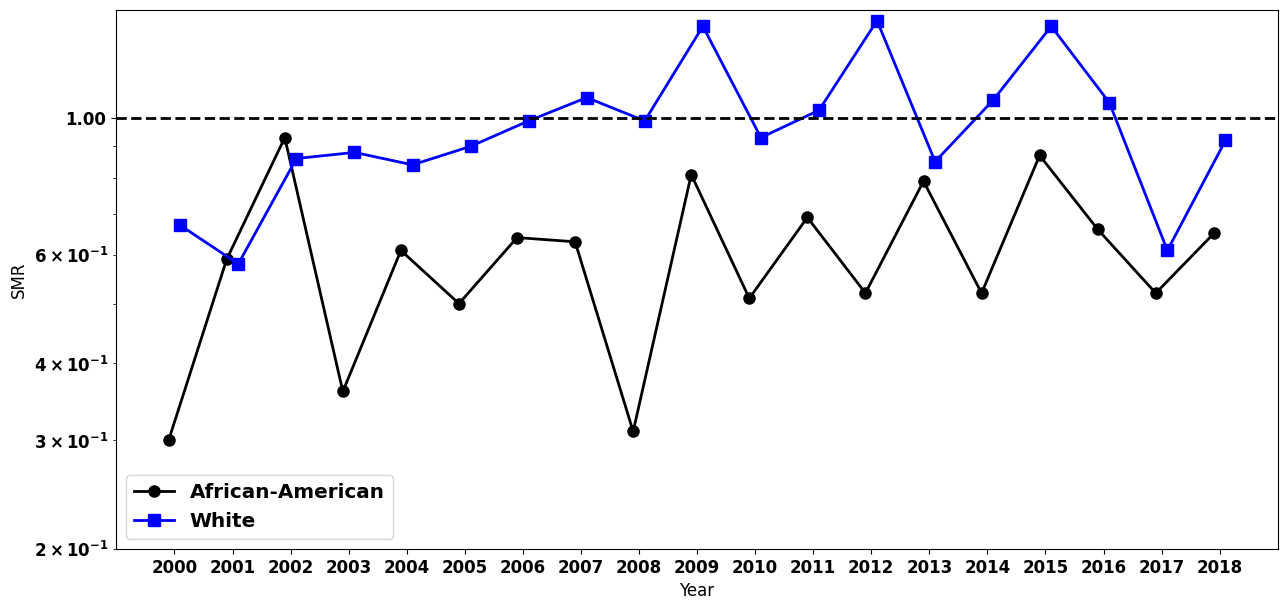

In [ ]:
# Set up the plot
plt.figure(figsize=(15, 7))
plt.xticks(rotation=0)
plt.yscale('log')
plt.ylim(0.2, 1.5)
plt.xlabel('Year')
plt.ylabel('SMR')

# Plot the data
plt.plot(smrs.index - 0.1, smrs['blsmr'], marker='o', label='African-American', color='black', markersize=8, linewidth=2)
plt.plot(smrs.index + 0.1, smrs['whsmr'], marker='s', label='White', color='blue', markersize=8, linewidth=2)

# Add legend
plt.legend(loc='lower left', fontsize='large')

# Add horizontal line at y=1
plt.axhline(y=1, linestyle='dashed', linewidth=2, color='black')

# Add x-axis ticks
plt.xticks(smrs.index)

# Set y-axis formatter to disable scientific notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Show the plot
plt.show()